In [418]:
unit_weight_mean = 22 #kN/m3 -from Tubaldi et al. (2018)
unit_weight_cv = 0.10 #dimensionless -from Mendoza Cabanzo et al. (2022)

In [419]:
unit_weight_std = unit_weight_mean * unit_weight_cv #kN/m3
print(unit_weight_std)

2.2


In [420]:
# For more info, look at https://stackoverflow.com/questions/10138085/how-to-plot-normal-distribution
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [421]:
pi = math.pi

In [422]:
no_samples = 100000
unit_weight_values = np.linspace(unit_weight_mean-3*unit_weight_std, unit_weight_mean+3*unit_weight_std, no_samples)

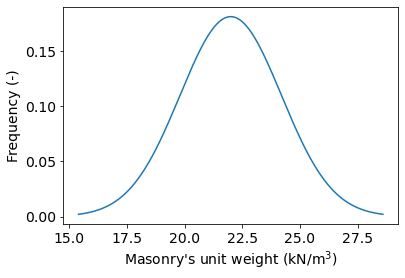

In [423]:
plt.plot(unit_weight_values, stats.norm.pdf(unit_weight_values, unit_weight_mean, unit_weight_std))
plt.xlabel("Masonry's unit weight (kN/m$^3$)") #for more info, look at https://www.delftstack.com/howto/matplotlib/python-matplotlib-plot-superscript/#:~:text=To%20make%20subscripts%2C%20you%20have,will%20be%20over%20the%20character.
plt.ylabel("Frequency (-)")
characters_size = 14
plt.rc('axes', labelsize = characters_size) #for more info, look at https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
plt.rc('xtick', labelsize = characters_size)
plt.rc('ytick', labelsize = characters_size)


In [424]:
#import random #for more info, https://stackoverflow.com/questions/30030659/in-python-what-is-the-difference-between-random-uniform-and-random-random#:~:text=It's%20very%20common%20to%20generate,to%20specify%20a%20different%20range.

#unif_random_numbers = np.random.uniform(0,1, no_samples) #for more info, https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html

#print(unif_random_numbers)

In [425]:
#To guarantee reproducibility, the seed function can be used. Random.uniform() returns a new random number from a PRNG sequence. When that PRNG sequence is
#seeded with the same value, it produces the same sequence. Random is seeded with current system time on module import by default.
#The seed must be stated explicitly to enable reproduction of the same sequence, which can be important for simulations.
#for more, https://stackoverflow.com/questions/32489360/do-i-need-to-use-random-seed-with-random-uniform-to-ensure-i-get-different-s

import scipy as sp #for more, https://subscription.packtpub.com/book/big-data-&-business-intelligence/9781787125698/12/ch25lvl1sec126/generating-random-numbers-from-a-uniform-distribution
sp.random.seed(2)

unif_random_numbers = sp.random.uniform(low=0, high=1, size = no_samples)
unif_random_numbers[0:5] #for more, https://stackoverflow.com/questions/29793345/how-to-read-the-first-row-of-an-array-in-python

array([0.4359949 , 0.02592623, 0.54966248, 0.43532239, 0.4203678 ])

In [426]:
unit_weight_realizations_standard = stats.norm.ppf(unif_random_numbers) #for more info, https://stackoverflow.com/questions/20626994/how-to-calculate-the-inverse-of-the-normal-cumulative-distribution-function-in-p
unit_weight_realizations_standard[0:5]

array([-0.16113153, -1.9443566 ,  0.12480864, -0.16283953, -0.20095264])

In [427]:
unit_weight_realizations_distribution = (unit_weight_std * unit_weight_realizations_standard) + unit_weight_mean #for more info, https://www.probabilitycourse.com/chapter4/4_2_3_normal.php
unit_weight_realizations_distribution[0:5]

array([21.64551063, 17.72241548, 22.27457902, 21.64175304, 21.55790419])

In [428]:
Ed_arch = 242 #kN -from Arch_NoScour_DeterministicModel_Total.ipynb-, -the springing thrust in the arch due to all vertical loads-
Ed_arch_new = (Ed_arch/unit_weight_mean) * unit_weight_realizations_distribution #the unit weight is linear across equations, therefore the found deterministic value can be divided by the paper value, and then multiplied by the random variable values
Ed_arch_new[0:5]

array([238.10061688, 194.94657029, 245.02036918, 238.05928344,
       237.13694604])

In [429]:
Ed_arch_new = np.array([Ed_arch_new]).T #for more, https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html
Ed_arch_new[0:5]

array([[238.10061688],
       [194.94657029],
       [245.02036918],
       [238.05928344],
       [237.13694604]])

In [430]:
Rd = 386 #kN -from Arch_NoScour_DeterministicModel.ipynb

In [431]:
safety_margin = Rd - Ed_arch_new #it is only a test, since more Rd values than one are needed
safety_margin[0:5]

array([[147.89938312],
       [191.05342971],
       [140.97963082],
       [147.94071656],
       [148.86305396]])

In [432]:
#Ed_tot_new.to_csv('demand') #for more, https://www.codegrepper.com/code-examples/python/numpy+to_csv
import pandas as pd #for more, https://www.codegrepper.com/code-examples/python/numpy+to_csv
pd.DataFrame(Ed_arch_new).to_csv("demand.csv")